In [3]:
from src.utils import backproject, create_instance_seg, id_generation, vis

import torch
import numpy as np
import glob
import pickle


In [4]:
input_folder = '/home/koerner/Project/nice-slam/Datasets/Replica/room0'
color_paths = sorted(glob.glob(f'/home/koerner/Project/nice-slam/Datasets/Replica/room0/results/frame*.jpg'))
depth_paths = sorted(
            glob.glob(f'/home/koerner/Project/nice-slam/Datasets/Replica/room0/results/depth*.png'))
#mask_paths = sorted(glob.glob(f'/home/koerner/Project/nice-slam/Datasets/generated/room0/results/mask*.pkl'))
path_c2w = '/home/koerner/Project/nice-slam/Datasets/Replica/room0/traj.txt'
T_wc = np.loadtxt(path_c2w).reshape(-1, 4, 4)
K = np.array([[600, 0.0, 599.5], [0.0, 600, 339.5], [0.0, 0.0, 1.0]])

In [5]:
path = "/home/koerner/Project/nice-slam/Datasets/Replica/room0_small/results"

In [8]:
import cv2
import os

In [12]:
for p in color_paths[:60]:
    img = cv2.imread(p)
    cv2.imwrite(os.path.join(path, os.path.basename(p)), img)


In [14]:
for p in depth_paths[:60]:
    img = cv2.imread(p)
    cv2.imwrite(os.path.join(path, os.path.basename(p)), img)

In [15]:
t_part = T_wc[:60]
t_part = t_part.flatten()
np.save(os.path.join(path, "traj.txt"), t_part)

In [3]:
index = 0
with open(mask_paths[index], 'rb') as f:
    masks0 = pickle.load(f)

semantic_data0 = id_generation.generateIds(masks0)
id_counter = semantic_data0.max() +1

In [4]:
visualizer = vis.visualizerForIds()

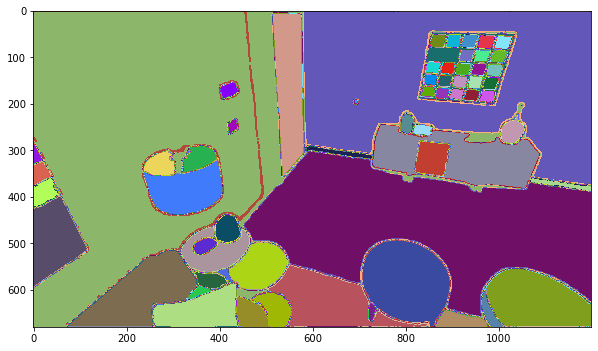

In [5]:
visualizer.visualizer(semantic_data0)

In [6]:
semantic_frames = []
semantic_frames.append(semantic_data0)

In [7]:
index = 5
with open(mask_paths[index], 'rb') as f:
    masks5 = pickle.load(f)

semantic_data5 = id_generation.generateIds(masks5)


In [ ]:
map , id_counter= id_generation.create_complete_mapping_of_current_frame(
                    semantic_data5,
                    index,
                    [0],  # Corrected slice notation
                    T_wc,
                    K,
                    depth_paths,
                    semantic_frames,
                    id_counter,
                    every_frame=5,
                    points_per_instance=5,  # Corrected parameter name
                    verbose=True
                )
semantic_data = id_generation.update_current_frame(semantic_data5, map)

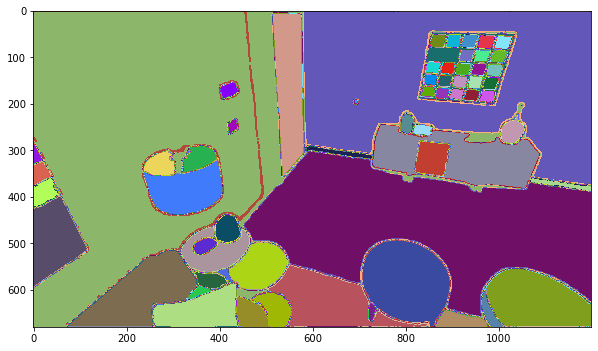

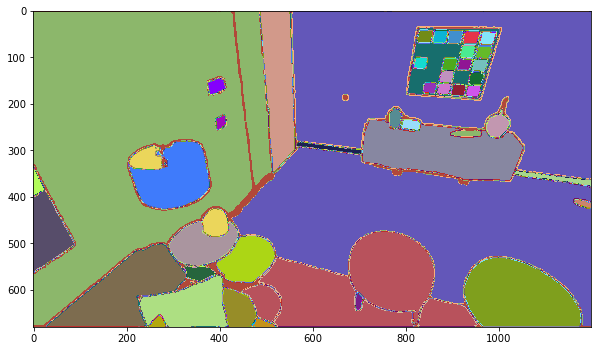

(None, None)

In [9]:
visualizer.visualizer(semantic_data0), visualizer.visualizer(semantic_data)

In [10]:
semantic_data0[:10, :10] == semantic_data[:10, :10]

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [11]:
import cv2
def readDepth(filepath):
    depth = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    depth_data = depth.astype(np.float32) / 6553.5
    depth_data = torch.from_numpy(depth_data)
    return depth_data

In [4]:
class A(object):
    def f(self, i):
        print(i)
    def f(self):
        print("hello")

In [5]:
o = A()

In [7]:
o.f(1)

TypeError: f() takes 1 positional argument but 2 were given